In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
from jove.JoveEditor import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6733, done.
remote: Counting objects: 100% (2099/2099), done.
remote: Compressing objects: 100% (845/845), done.
remote: Total 6733 (delta 1279), reused 1956 (delta 1173), pack-reused 4634 (from 1)
Receiving objects: 100% (6733/6733), 10.65 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (4284/4284), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help c

# In all these questions, good succinct documentation is expected.  
## This means the following:
###  * For PDA, document the states that match from the stack and other crucial states
###  * For CFG, document, after each production rule, the language that the rule is supposed to generate
### * The number of states of the directly designed PDA should not be excessive - we are not looking for a certain minimal count
### * The number of CFG rules should also be not excessive, but we are not looking for a certain minimal count


# --------------------

# Question 1 : 35\% :  Points for designing the PDA and running the tests.

## Given the language
### Labcd = { a^i b^j c^k d^l : i=k OR j=l, \; and i,j,k,l > 0 }

## Obtain a PDA directly (i.e., don't design a CFG and then turn it into a PDA). Enter the PDA below in the space after "Labcd = md2mc...".

###  *THE TESTS OF THIS PDA WILL BE UNDER QUESTION 3. These tests will be entered and run on the lines that say explore_pda(string, Labcd).*

In [7]:
Labcd = md2mc('''

PDA
!! We will have two branches, one for i=k (S1) and one for j=l (S2)

!! First branch straight to reading a's
I : '' , '' ; '' -> S1_A
I : '' , '' ; '' -> S2_A

!! First branch: i = k, i.e. #a = #c
S1_A : a , '' ; a -> S1_A   !! add more A's to the stack
S1_A : '' , a ; a -> S1_B    !! if we've read at least one a we can go to b
!! cannot skip b so we don't need any more transitions

S1_B : b , '' ; '' -> S1_B  !! read as many b's as we want
S1_B : b , '' ; '' -> S1_C  !! prepare to read c's but make sure we've read at least one b

S1_C : c , a ; '' -> S1_C   !! Remove a's from the stack as we read c's
S1_C : '' , # ; #  -> S1_D  !! When the stack runs out start reading d's.

S1_D : d , '' ; '' -> S1_D  !! read as many d's as we want
S1_D : d , '' ; '' -> F     !! finish if we've read at least one D

!! Second branch: j = l, i.e. #b = #d. Very similar.
S2_A : a , '' ; '' -> S2_A
S2_A : a , '' ; '' -> S2_B

S2_B : b , '' ; b  -> S2_B
S2_B : '' , b ; b  -> S2_C

S2_C : c , '' ; '' -> S2_C
S2_C : c , '' ; '' -> S2_D

S2_D : d , b ; ''  -> S2_D
S2_D : '', # ; #  -> F

''')


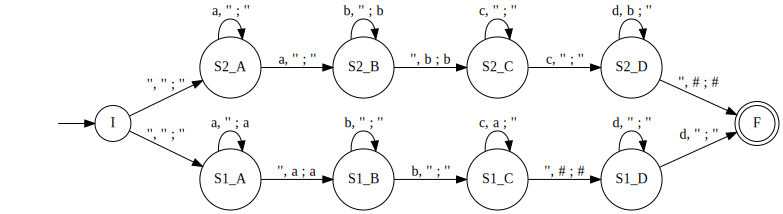

In [8]:
dotObj_pda(Labcd, FuseEdges=True)

# Question 2 : 35\%   

# Now capture the above language in a CFG.  i.e. this is a CFG that encodes the above language directly. You are not converting the PDA above into a CFG.

#*ENTER THE CFG IN THE SPACE BELOW WHICH SAYS "ENTER THE CFG HERE"*.


# Question 3: 30\% :  

# *NOW CONVERT THE CFG INTO A PDA AND RUN IT ON THE TESTS "explore_pda(string, abcdPDA)"*




In [16]:
# Now let's define a PDA

'''
ENTER THE CFG HERE.
---BEGIN CFG---
!! A = a*, B=b*, etc
!! X = a^i b* c^i, Y = b^i c* d^i.
S -> X D | A Y

X -> a X c | B
Y -> b Y d | C

A -> a A | ''
B -> b B | ''
C -> c C | ''
D -> d D | ''
---END CFG---
'''

abcdPDA = md2mc('''PDA
!! Start in state S
I : '' , # ; S# -> W

!! Work state

!! Accept when stack is empty
W : '' , # ; # -> F

!! Read terminals
W : a , a ; '' -> W
W : b , b ; '' -> W
W : c , c ; '' -> W
W : d , d ; '' -> W

!! Handle non-terminals
W : '' , S ; XD -> W
W : '' , S ; AY -> W

W : '' , X ; aXc -> W
W : '' , X ; B -> W

W : '' , Y ; bYd -> W
W : '' , Y ; C -> W

W : '' , A ; aA -> W
W : '' , A ; '' -> W
W : '' , B ; bB -> W
W : '' , B ; '' -> W
W : '' , C ; cC -> W
W : '' , C ; '' -> W
W : '' , D ; dD -> W
W : '' , D ; '' -> W
''')


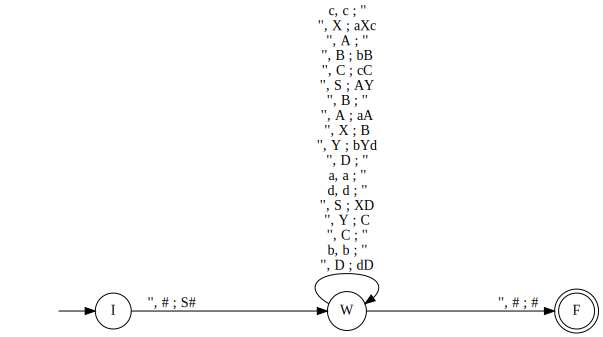

In [17]:
dotObj_pda(abcdPDA, FuseEdges=True)

# Test-1 for Labcd (QUESTION 1) and abcdPDA (QUESTION 3) - both must pass the test run of "abcd".

# *I provide these tests together so that you can easily cross-check them!*

In [18]:
explore_pda("abcd", Labcd , STKMAX=10)

String abcd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abcd', '#')
->  ('S1_A', 'abcd', '#')
->  ('S1_A', 'bcd', 'a#')
->  ('S1_B', 'bcd', 'a#')
->  ('S1_C', 'cd', 'a#')
->  ('S1_C', 'd', '#')
->  ('S1_D', 'd', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abcd', '#')
->  ('S2_A', 'abcd', '#')
->  ('S2_B', 'bcd', '#')
->  ('S2_B', 'cd', 'b#')
->  ('S2_C', 'cd', 'b#')
->  ('S2_D', 'd', 'b#')
->  ('S2_D', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda("abcd",  abcdPDA, STKMAX=10)

String abcd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abcd', '#')
->  ('W', 'abcd', 'S#')
->  ('W', 'abcd', 'XD#')
->  ('W', 'abcd', 'aXcD#')
->  ('W', 'bcd', 'XcD#')
->  ('W', 'bcd', 'BcD#')
->  ('W', 'bcd', 'bBcD#')
->  ('W', 'cd', 'BcD#')
->  ('W', 'cd', 'cD#')
->  ('W', 'd', 'D#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abcd', '#')
->  ('W', 'abcd', 'S#')
->  ('W', 'abcd', 'AY#')
->  ('W', 'abcd', 'aAY#')
->  ('W', 'bcd', 'AY#')
->  ('W', 'bcd', 'Y#')
->  ('W', 'bcd', 'bYd#')
->  ('W', 'cd', 'Yd#')
->  ('W', 'cd', 'Cd#')
->  ('W', 'cd', 'cCd#')
->  ('W', 'd', 'Cd#')
->  ('W', 'd', 'd#')
->  ('W', '', '#')
->  ('F', '', '#') .


# TEST-2 for Labcd and abcdPDA (pass both)

In [20]:
explore_pda("aabbbbcccccdddd",  Labcd, STKMAX=9)

String aabbbbcccccdddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbcccccdddd', '#')
->  ('S2_A', 'aabbbbcccccdddd', '#')
->  ('S2_A', 'abbbbcccccdddd', '#')
->  ('S2_B', 'bbbbcccccdddd', '#')
->  ('S2_B', 'bbbcccccdddd', 'b#')
->  ('S2_B', 'bbcccccdddd', 'bb#')
->  ('S2_B', 'bcccccdddd', 'bbb#')
->  ('S2_B', 'cccccdddd', 'bbbb#')
->  ('S2_C', 'cccccdddd', 'bbbb#')
->  ('S2_C', 'ccccdddd', 'bbbb#')
->  ('S2_C', 'cccdddd', 'bbbb#')
->  ('S2_C', 'ccdddd', 'bbbb#')
->  ('S2_C', 'cdddd', 'bbbb#')
->  ('S2_D', 'dddd', 'bbbb#')
->  ('S2_D', 'ddd', 'bbb#')
->  ('S2_D', 'dd', 'bb#')
->  ('S2_D', 'd', 'b#')
->  ('S2_D', '', '#')
->  ('F', '', '#') .


In [21]:
explore_pda("aabbbbcccccdddd",  abcdPDA, STKMAX=9)

String aabbbbcccccdddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbcccccdddd', '#')
->  ('W', 'aabbbbcccccdddd', 'S#')
->  ('W', 'aabbbbcccccdddd', 'AY#')
->  ('W', 'aabbbbcccccdddd', 'aAY#')
->  ('W', 'abbbbcccccdddd', 'AY#')
->  ('W', 'abbbbcccccdddd', 'aAY#')
->  ('W', 'bbbbcccccdddd', 'AY#')
->  ('W', 'bbbbcccccdddd', 'Y#')
->  ('W', 'bbbbcccccdddd', 'bYd#')
->  ('W', 'bbbcccccdddd', 'Yd#')
->  ('W', 'bbbcccccdddd', 'bYdd#')
->  ('W', 'bbcccccdddd', 'Ydd#')
->  ('W', 'bbcccccdddd', 'bYddd#')
->  ('W', 'bcccccdddd', 'Yddd#')
->  ('W', 'bcccccdddd', 'bYdddd#')
->  ('W', 'cccccdddd', 'Ydddd#')
->  ('W', 'cccccdddd', 'Cdddd#')
->  ('W', 'cccccdddd', 'cCdddd#')
->  ('W', 'ccccdddd', 'Cdddd#')
->  ('W', 'ccccdddd', 'cCdddd#')
->  ('W', 'cccdddd', 'Cdddd#')
->  ('W', 'cccdddd', 'cCdddd#')
->  ('W', 'ccdddd', 'Cdddd#')
->  ('W', 'ccdddd', 'cCdddd#')
->  ('W', 'cdddd', 'Cdddd#')
->  ('W', 'cdddd', 'cCdddd#')
->  ('

# Test-3 for Labcd and abcdPDA (fail both)

In [22]:
explore_pda("aabbbcccccdddd",  Labcd, STKMAX=9)

String aabbbcccccdddd rejected by your PDA :-(
Visited states are:
{('S2_C', 'cccccdddd', 'bbb#'), ('S2_C', 'ccdddd', 'bbb#'), ('S2_C', 'cccdddd', 'bbb#'), ('S2_B', 'abbbcccccdddd', '#'), ('S1_A', 'aabbbcccccdddd', '#'), ('S2_C', 'bcccccdddd', 'bb#'), ('S2_B', 'bbbcccccdddd', '#'), ('S1_D', 'cccdddd', '#'), ('S2_D', 'dd', 'b#'), ('S2_C', 'bbcccccdddd', 'b#'), ('S1_C', 'bcccccdddd', 'aa#'), ('S2_A', 'abbbcccccdddd', '#'), ('S1_B', 'bcccccdddd', 'aa#'), ('S2_D', 'cdddd', 'bbb#'), ('S1_B', 'bbbcccccdddd', 'aa#'), ('S2_C', 'cdddd', 'bbb#'), ('F', 'd', '#'), ('S1_A', 'bbbcccccdddd', 'aa#'), ('S1_C', 'ccccdddd', 'a#'), ('S2_A', 'bbbcccccdddd', '#'), ('S1_C', 'cccccdddd', 'aa#'), ('S2_D', 'd', '#'), ('S1_C', 'bbcccccdddd', 'aa#'), ('S1_B', 'abbbcccccdddd', 'a#'), ('S2_B', 'cccccdddd', 'bbb#'), ('S1_A', 'abbbcccccdddd', 'a#'), ('S2_A', 'aabbbcccccdddd', '#'), ('S2_C', 'ccccdddd', 'bbb#'), ('S1_B', 'cccccdddd', 'aa#'), ('S2_D', 'ddd', 'bb#'), ('S2_D', 'ccdddd', 'bbb#'), ('S2_D', 'cccdddd', 'bbb

In [23]:
explore_pda("aabbbcccccdddd",  abcdPDA, STKMAX=9)

String aabbbcccccdddd rejected by your PDA :-(
Visited states are:
{('W', 'bcccccdddd', 'ccD#'), ('W', 'cccccdddd', 'bBccD#'), ('W', 'aabbbcccccdddd', 'Y#'), ('W', 'cccccdddd', 'Yddd#'), ('W', 'bbbcccccdddd', 'aAY#'), ('W', 'abbbcccccdddd', 'cD#'), ('W', 'bbbcccccdddd', 'bYd#'), ('W', 'aabbbcccccdddd', 'S#'), ('W', 'ccccdddd', 'cCddd#'), ('W', 'ccccdddd', 'ddd#'), ('W', 'abbbcccccdddd', 'C#'), ('W', 'aabbbcccccdddd', 'aAY#'), ('W', 'dd', 'd#'), ('W', 'ccdddd', 'cCddd#'), ('W', 'cccccdddd', 'ccD#'), ('W', 'aabbbcccccdddd', 'bYd#'), ('W', 'abbbcccccdddd', '#'), ('W', 'bcccccdddd', 'BccD#'), ('W', 'dddd', 'cCddd#'), ('W', 'dddd', 'ddd#'), ('W', 'ccccdddd', 'Cddd#'), ('W', 'bbcccccdddd', 'cCd#'), ('W', 'abbbcccccdddd', 'bBcD#'), ('W', 'abbbcccccdddd', 'AY#'), ('W', 'ccdddd', 'Cddd#'), ('W', 'cccdddd', 'Cddd#'), ('F', 'cccdddd', '#'), ('W', 'aabbbcccccdddd', 'D#'), ('W', 'bbbcccccdddd', 'bBccD#'), ('W', 'dddd', 'Cddd#'), ('W', 'bbbcccccdddd', 'XccD#'), ('W', 'abbbcccccdddd', 'Y#'), ('W', 'c

# Test-4 for Labcd and abcdPDA (fail both)

In [25]:
explore_pda("aaaababbbccccdddd",  Labcd, STKMAX=9)

String aaaababbbccccdddd rejected by your PDA :-(
Visited states are:
{('S1_B', 'ababbbccccdddd', 'aaa#'), ('S1_A', 'ababbbccccdddd', 'aaa#'), ('S1_C', 'abbbccccdddd', 'aaaa#'), ('S2_A', 'babbbccccdddd', '#'), ('S2_B', 'babbbccccdddd', '#'), ('S2_A', 'aaababbbccccdddd', '#'), ('S2_B', 'aaababbbccccdddd', '#'), ('S2_A', 'ababbbccccdddd', '#'), ('S1_B', 'aaababbbccccdddd', 'a#'), ('S1_B', 'aababbbccccdddd', 'aa#'), ('S1_A', 'aababbbccccdddd', 'aa#'), ('S1_B', 'babbbccccdddd', 'aaaa#'), ('S2_A', 'aababbbccccdddd', '#'), ('S2_C', 'abbbccccdddd', 'b#'), ('S1_A', 'aaababbbccccdddd', 'a#'), ('S1_B', 'abbbccccdddd', 'aaaa#'), ('S2_B', 'ababbbccccdddd', '#'), ('S1_A', 'babbbccccdddd', 'aaaa#'), ('S1_A', 'aaaababbbccccdddd', '#'), ('S2_B', 'abbbccccdddd', 'b#'), ('I', 'aaaababbbccccdddd', '#'), ('S2_B', 'aababbbccccdddd', '#'), ('S2_A', 'aaaababbbccccdddd', '#')}


In [24]:
explore_pda("aaaababbbccccdddd",  abcdPDA, STKMAX=9)

String aaaababbbccccdddd rejected by your PDA :-(
Visited states are:
{('W', 'babbbccccdddd', 'Y#'), ('W', 'babbbccccdddd', 'bBccccD#'), ('W', 'abbbccccdddd', 'bYdd#'), ('W', 'aababbbccccdddd', 'aXcccD#'), ('W', 'aaaababbbccccdddd', 'cC#'), ('W', 'aababbbccccdddd', 'Y#'), ('W', 'babbbccccdddd', 'aAY#'), ('F', 'babbbccccdddd', '#'), ('W', 'abbbccccdddd', 'Yd#'), ('W', 'ababbbccccdddd', 'cccD#'), ('W', 'aaababbbccccdddd', 'aAY#'), ('W', 'aaababbbccccdddd', 'bYd#'), ('W', 'aaaababbbccccdddd', 'dD#'), ('W', 'ababbbccccdddd', 'bYd#'), ('W', 'aababbbccccdddd', 'aAY#'), ('W', 'babbbccccdddd', 'aXcccccD#'), ('W', 'abbbccccdddd', 'bBccccD#'), ('W', 'babbbccccdddd', 'C#'), ('F', 'aababbbccccdddd', '#'), ('W', 'aababbbccccdddd', 'bYd#'), ('W', 'babbbccccdddd', 'ccccD#'), ('W', 'ababbbccccdddd', 'bBcccD#'), ('W', 'aaaababbbccccdddd', 'bBD#'), ('W', 'babbbccccdddd', 'AY#'), ('W', 'aaababbbccccdddd', '#'), ('W', 'abbbccccdddd', 'cCd#'), ('W', 'aaababbbccccdddd', 'aXccD#'), ('W', 'aaababbbccccdddd', 

# Test-5 for Labcd and abcdPDA (pass both)

In [26]:
explore_pda("aaaabccccd",  Labcd, STKMAX=9)

String aaaabccccd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabccccd', '#')
->  ('S1_A', 'aaaabccccd', '#')
->  ('S1_A', 'aaabccccd', 'a#')
->  ('S1_A', 'aabccccd', 'aa#')
->  ('S1_A', 'abccccd', 'aaa#')
->  ('S1_A', 'bccccd', 'aaaa#')
->  ('S1_B', 'bccccd', 'aaaa#')
->  ('S1_C', 'ccccd', 'aaaa#')
->  ('S1_C', 'cccd', 'aaa#')
->  ('S1_C', 'ccd', 'aa#')
->  ('S1_C', 'cd', 'a#')
->  ('S1_C', 'd', '#')
->  ('S1_D', 'd', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabccccd', '#')
->  ('S2_A', 'aaaabccccd', '#')
->  ('S2_A', 'aaabccccd', '#')
->  ('S2_A', 'aabccccd', '#')
->  ('S2_A', 'abccccd', '#')
->  ('S2_B', 'bccccd', '#')
->  ('S2_B', 'ccccd', 'b#')
->  ('S2_C', 'ccccd', 'b#')
->  ('S2_C', 'cccd', 'b#')
->  ('S2_C', 'ccd', 'b#')
->  ('S2_C', 'cd', 'b#')
->  ('S2_D', 'd', 'b#')
->  ('S2_D', '', '#')
->  ('F', '', '#') .


In [27]:
explore_pda("aaaabccccd",  abcdPDA, STKMAX=9)

String aaaabccccd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabccccd', '#')
->  ('W', 'aaaabccccd', 'S#')
->  ('W', 'aaaabccccd', 'XD#')
->  ('W', 'aaaabccccd', 'aXcD#')
->  ('W', 'aaabccccd', 'XcD#')
->  ('W', 'aaabccccd', 'aXccD#')
->  ('W', 'aabccccd', 'XccD#')
->  ('W', 'aabccccd', 'aXcccD#')
->  ('W', 'abccccd', 'XcccD#')
->  ('W', 'abccccd', 'aXccccD#')
->  ('W', 'bccccd', 'XccccD#')
->  ('W', 'bccccd', 'BccccD#')
->  ('W', 'bccccd', 'bBccccD#')
->  ('W', 'ccccd', 'BccccD#')
->  ('W', 'ccccd', 'ccccD#')
->  ('W', 'cccd', 'cccD#')
->  ('W', 'ccd', 'ccD#')
->  ('W', 'cd', 'cD#')
->  ('W', 'd', 'D#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Test-6 for Labcd and abcdPDA (pass both)

In [28]:
explore_pda("aaaabbccccdd",  Labcd, STKMAX=9)

String aaaabbccccdd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabbccccdd', '#')
->  ('S1_A', 'aaaabbccccdd', '#')
->  ('S1_A', 'aaabbccccdd', 'a#')
->  ('S1_A', 'aabbccccdd', 'aa#')
->  ('S1_A', 'abbccccdd', 'aaa#')
->  ('S1_A', 'bbccccdd', 'aaaa#')
->  ('S1_B', 'bbccccdd', 'aaaa#')
->  ('S1_B', 'bccccdd', 'aaaa#')
->  ('S1_C', 'ccccdd', 'aaaa#')
->  ('S1_C', 'cccdd', 'aaa#')
->  ('S1_C', 'ccdd', 'aa#')
->  ('S1_C', 'cdd', 'a#')
->  ('S1_C', 'dd', '#')
->  ('S1_D', 'dd', '#')
->  ('S1_D', 'd', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabbccccdd', '#')
->  ('S2_A', 'aaaabbccccdd', '#')
->  ('S2_A', 'aaabbccccdd', '#')
->  ('S2_A', 'aabbccccdd', '#')
->  ('S2_A', 'abbccccdd', '#')
->  ('S2_B', 'bbccccdd', '#')
->  ('S2_B', 'bccccdd', 'b#')
->  ('S2_B', 'ccccdd', 'bb#')
->  ('S2_C', 'ccccdd', 'bb#')
->  ('S2_C', 'cccdd', 'bb#')
->  ('S2_C', 'ccdd', 'bb#')
->  ('S2_C', '

In [29]:
explore_pda("aaaabbccccdd",  abcdPDA, STKMAX=9)

String aaaabbccccdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabbccccdd', '#')
->  ('W', 'aaaabbccccdd', 'S#')
->  ('W', 'aaaabbccccdd', 'XD#')
->  ('W', 'aaaabbccccdd', 'aXcD#')
->  ('W', 'aaabbccccdd', 'XcD#')
->  ('W', 'aaabbccccdd', 'aXccD#')
->  ('W', 'aabbccccdd', 'XccD#')
->  ('W', 'aabbccccdd', 'aXcccD#')
->  ('W', 'abbccccdd', 'XcccD#')
->  ('W', 'abbccccdd', 'aXccccD#')
->  ('W', 'bbccccdd', 'XccccD#')
->  ('W', 'bbccccdd', 'BccccD#')
->  ('W', 'bbccccdd', 'bBccccD#')
->  ('W', 'bccccdd', 'BccccD#')
->  ('W', 'bccccdd', 'bBccccD#')
->  ('W', 'ccccdd', 'BccccD#')
->  ('W', 'ccccdd', 'ccccD#')
->  ('W', 'cccdd', 'cccD#')
->  ('W', 'ccdd', 'ccD#')
->  ('W', 'cdd', 'cD#')
->  ('W', 'dd', 'D#')
->  ('W', 'dd', 'dD#')
->  ('W', 'd', 'D#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Test-7 for Labcd and abcdPDA (fail both)

In [30]:
explore_pda("aaaabbbcccdcddd",  Labcd, STKMAX=9)

String aaaabbbcccdcddd rejected by your PDA :-(
Visited states are:
{('S2_A', 'aabbbcccdcddd', '#'), ('S1_C', 'cdcddd', 'aa#'), ('S1_B', 'abbbcccdcddd', 'aaa#'), ('S1_A', 'abbbcccdcddd', 'aaa#'), ('S1_A', 'bbbcccdcddd', 'aaaa#'), ('S1_B', 'bbcccdcddd', 'aaaa#'), ('S2_B', 'abbbcccdcddd', '#'), ('S1_C', 'dcddd', 'a#'), ('S2_A', 'aaaabbbcccdcddd', '#'), ('S1_C', 'cccdcddd', 'aaaa#'), ('S2_B', 'bbcccdcddd', 'b#'), ('S2_A', 'aaabbbcccdcddd', '#'), ('S2_C', 'dcddd', 'bbb#'), ('I', 'aaaabbbcccdcddd', '#'), ('S1_A', 'aaabbbcccdcddd', 'a#'), ('S2_D', 'cdcddd', 'bbb#'), ('S2_D', 'dcddd', 'bbb#'), ('S1_B', 'aaabbbcccdcddd', 'a#'), ('S1_C', 'ccdcddd', 'aaa#'), ('S2_C', 'cdcddd', 'bbb#'), ('S2_B', 'cccdcddd', 'bbb#'), ('S2_B', 'bcccdcddd', 'bb#'), ('S1_A', 'aaaabbbcccdcddd', '#'), ('S2_B', 'bbbcccdcddd', '#'), ('S2_B', 'aabbbcccdcddd', '#'), ('S2_D', 'ccdcddd', 'bbb#'), ('S2_A', 'abbbcccdcddd', '#'), ('S2_C', 'bbcccdcddd', 'b#'), ('S2_C', 'ccdcddd', 'bbb#'), ('S1_C', 'bcccdcddd', 'aaaa#'), ('S1_B',

In [31]:
explore_pda("aaaabbbcccdcddd",  abcdPDA, STKMAX=9)

String aaaabbbcccdcddd rejected by your PDA :-(
Visited states are:
{('W', 'aaaabbbcccdcddd', 'bBD#'), ('W', 'dcddd', 'cCddd#'), ('W', 'dcddd', 'ddd#'), ('W', 'bbcccdcddd', 'cCd#'), ('W', 'aaaabbbcccdcddd', 'BD#'), ('W', 'cdcddd', 'Cddd#'), ('W', 'abbbcccdcddd', 'cccD#'), ('W', 'cccdcddd', 'BccccD#'), ('W', 'aabbbcccdcddd', 'AY#'), ('W', 'dcddd', 'cD#'), ('W', 'aaaabbbcccdcddd', 'C#'), ('W', 'bcccdcddd', 'ccccD#'), ('W', 'aaaabbbcccdcddd', 'XD#'), ('W', 'aabbbcccdcddd', 'bBccD#'), ('W', 'abbbcccdcddd', 'bYd#'), ('W', 'bbcccdcddd', 'Cd#'), ('W', 'aabbbcccdcddd', 'cC#'), ('W', 'dcddd', 'Cddd#'), ('W', 'cccdcddd', 'bBccccD#'), ('W', 'aaabbbcccdcddd', 'C#'), ('W', 'aaaabbbcccdcddd', '#'), ('W', 'bbcccdcddd', 'ccccD#'), ('W', 'bcccdcddd', 'cCdd#'), ('W', 'bbbcccdcddd', 'bBccccD#'), ('F', 'abbbcccdcddd', '#'), ('W', 'cccdcddd', 'cCddd#'), ('W', 'cccdcddd', 'ddd#'), ('W', 'aaabbbcccdcddd', '#'), ('W', 'aaaabbbcccdcddd', 'aXcD#'), ('I', 'aaaabbbcccdcddd', '#'), ('W', 'aaabbbcccdcddd', 'BcD#'),

# End